In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from linear_regression import LinearRegression, optimal_weight_vector

## Read In Data

In [3]:
# read in data
cols=['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr', 'Fine Aggr', 'Slump']
df_train = pd.read_csv('../data/concrete/train.csv', names=cols)
df_test = pd.read_csv('../data/concrete/test.csv', names=cols)

X = df_train.drop('Slump', axis=1).values
y = df_train['Slump'].values

In [4]:
# get optimal weight vector
optimal_weight = optimal_weight_vector(X, y)

## Train Models
### Batch

In [5]:
# fit data with batch method
model_batch = LinearRegression(tol=1e-6)
model_batch.fit(X, y, r=1e-2, method='batch')

print('Weights')
print(model_batch.W)

print('\nNorm with Optimal')
print(np.linalg.norm((optimal_weight - model_batch.W)))

Weights
[-0.01520362  0.90022499  0.78594341  0.85066508  1.29862298  0.12983393
  1.5717928   0.99834709]

Norm with Optimal
0.0008862770719391832


### SGD

In [6]:
# fit data with sgd method
model_sgd = LinearRegression(tol=1e-6)
model_sgd.fit(X, y, r=10e-3, method='sgd')
# model_sgd.fit(X, y, r=1e-3, method='sgd', max_iter=1e6) # better norm

print('Weights')
print(model_sgd.W)

print('\nNorm with Optimal')
print(np.linalg.norm((optimal_weight - model_sgd.W)))

Weights
[-0.05283472  0.9757493   0.85739701  0.94184067  1.33384535  0.17106412
  1.6573061   1.08155626]

Norm with Optimal
0.19335743340501926


## Visualize Results

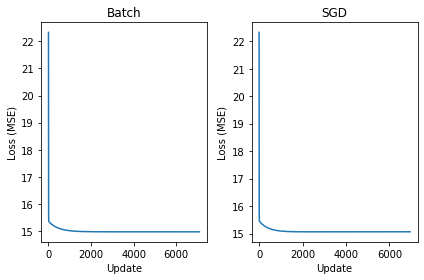

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(model_batch.loss)
ax[1].plot(model_sgd.loss)

for i, title in enumerate(['Batch', 'SGD']):
    ax[i].set_title(title)
    ax[i].set_xlabel('Update')
    ax[i].set_ylabel('Loss (MSE)')

fig.tight_layout()

In [8]:
# check iterations to convergence
print(f"Batch converged after: {len(model_batch.loss)} iterations")
print(f"SGD converged after:   {len(model_sgd.loss)} iterations")

Batch converged after: 7094 iterations
SGD converged after:   6948 iterations
